In this notebook we build pre-trained model to deploy in google cloud ai platform

In [4]:
#import dependencies
import torch, torchvision

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

In [ ]:
!git clone https://github.com/facebookresearch/detectron2.git
!pip install -e detectron2

In [1]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()


# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

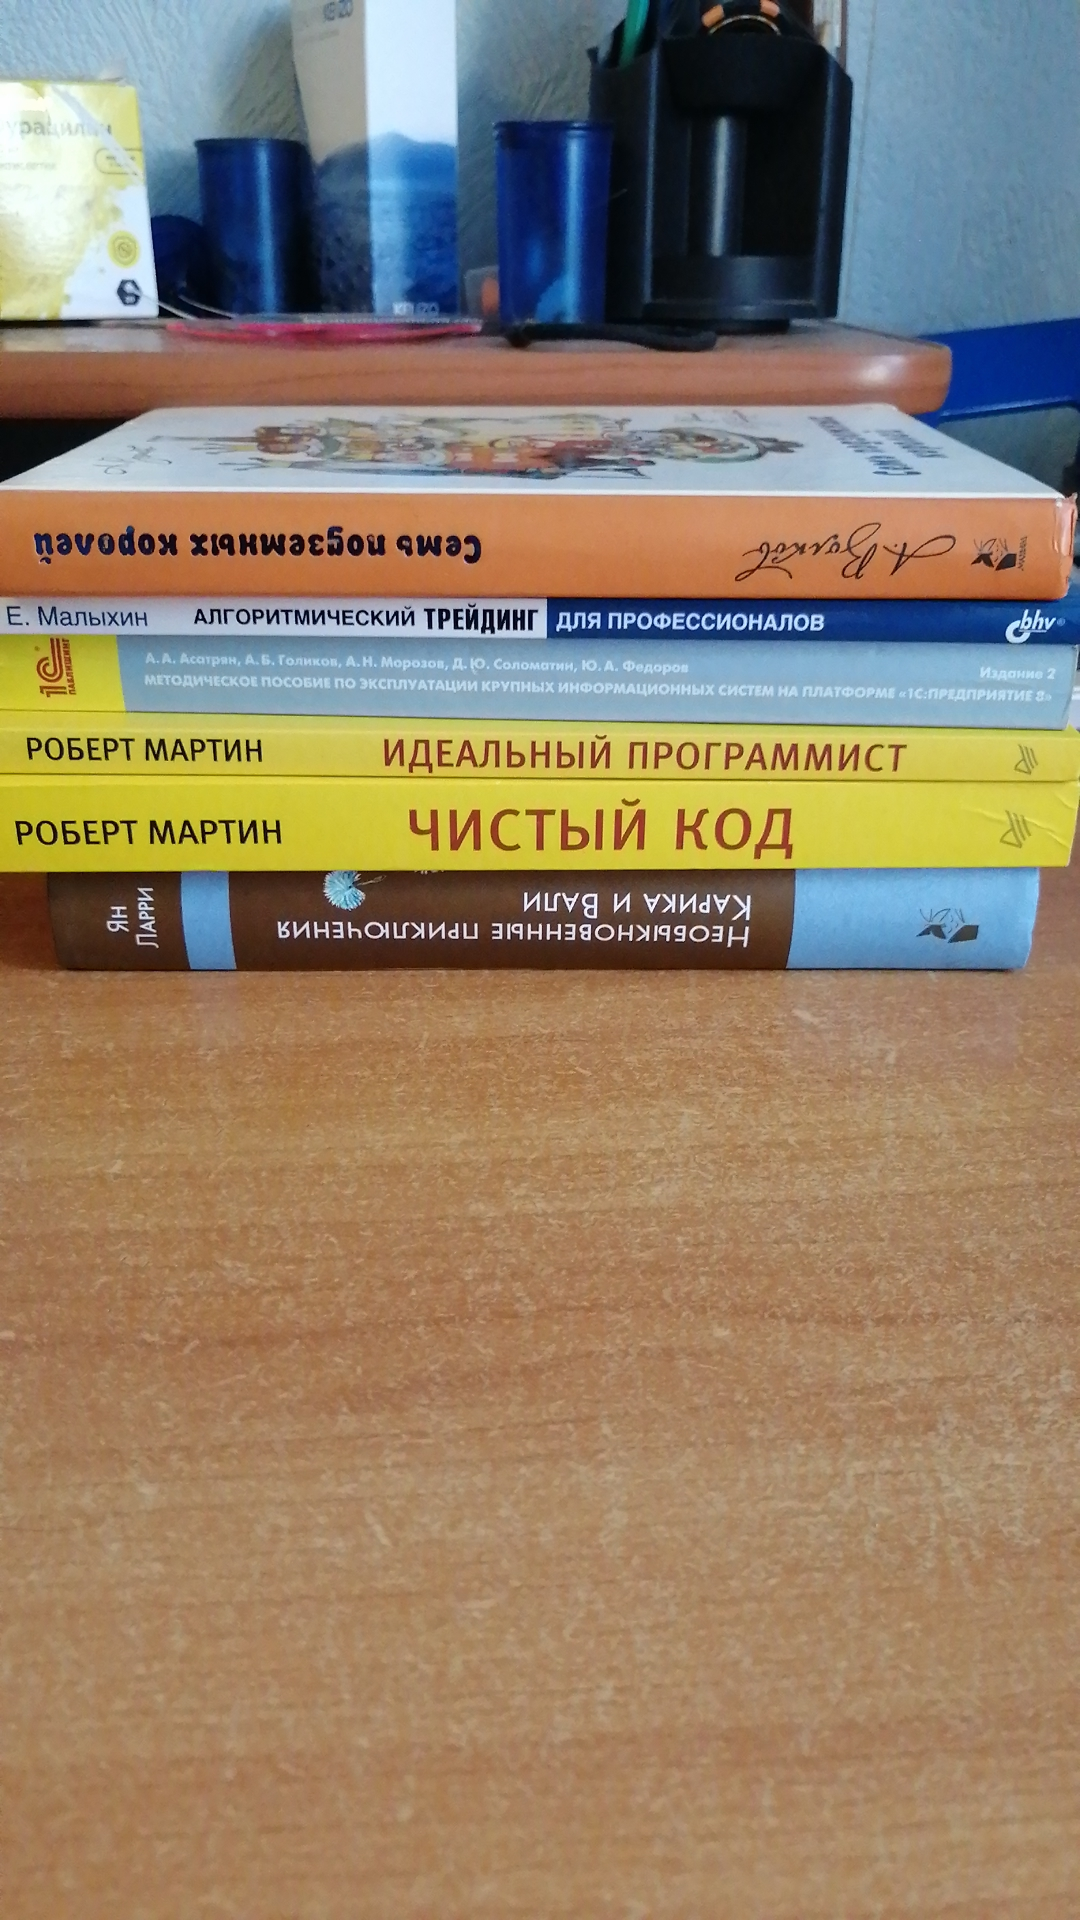

In [5]:
im = cv2.imread("test_photo.jpg")
cv2_imshow(im)


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!cp '/content/drive/MyDrive/Colab Notebooks/books/moduls/books.py' books.py

!ln -s /content/drive/MyDrive/DS_Projects/Books/data/ /mydrive
!ls /mydrive

books_1_raw.zip  books_3.zip			labeled_from_customer
books_1.zip	 data				output
books_2_raw.zip  data_fashion.zip		predicted_from_customer
books_2.zip	 instances_default_book_1.json	predict_samples
books_3_raw.zip  instances_default_book_2.json	yolov3


In [8]:
!cp -r /mydrive/output /content

In [16]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2 
cfg.MODEL.DEVICE = 'cpu' #cuda or cpu
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6   # set a custom testing threshold

predictor = DefaultPredictor(cfg)

In [19]:
#Делаем одиночное предсказание
file_name = 'test_photo.jpg'
im = cv2.imread(file_name)
outputs = predictor(im)  


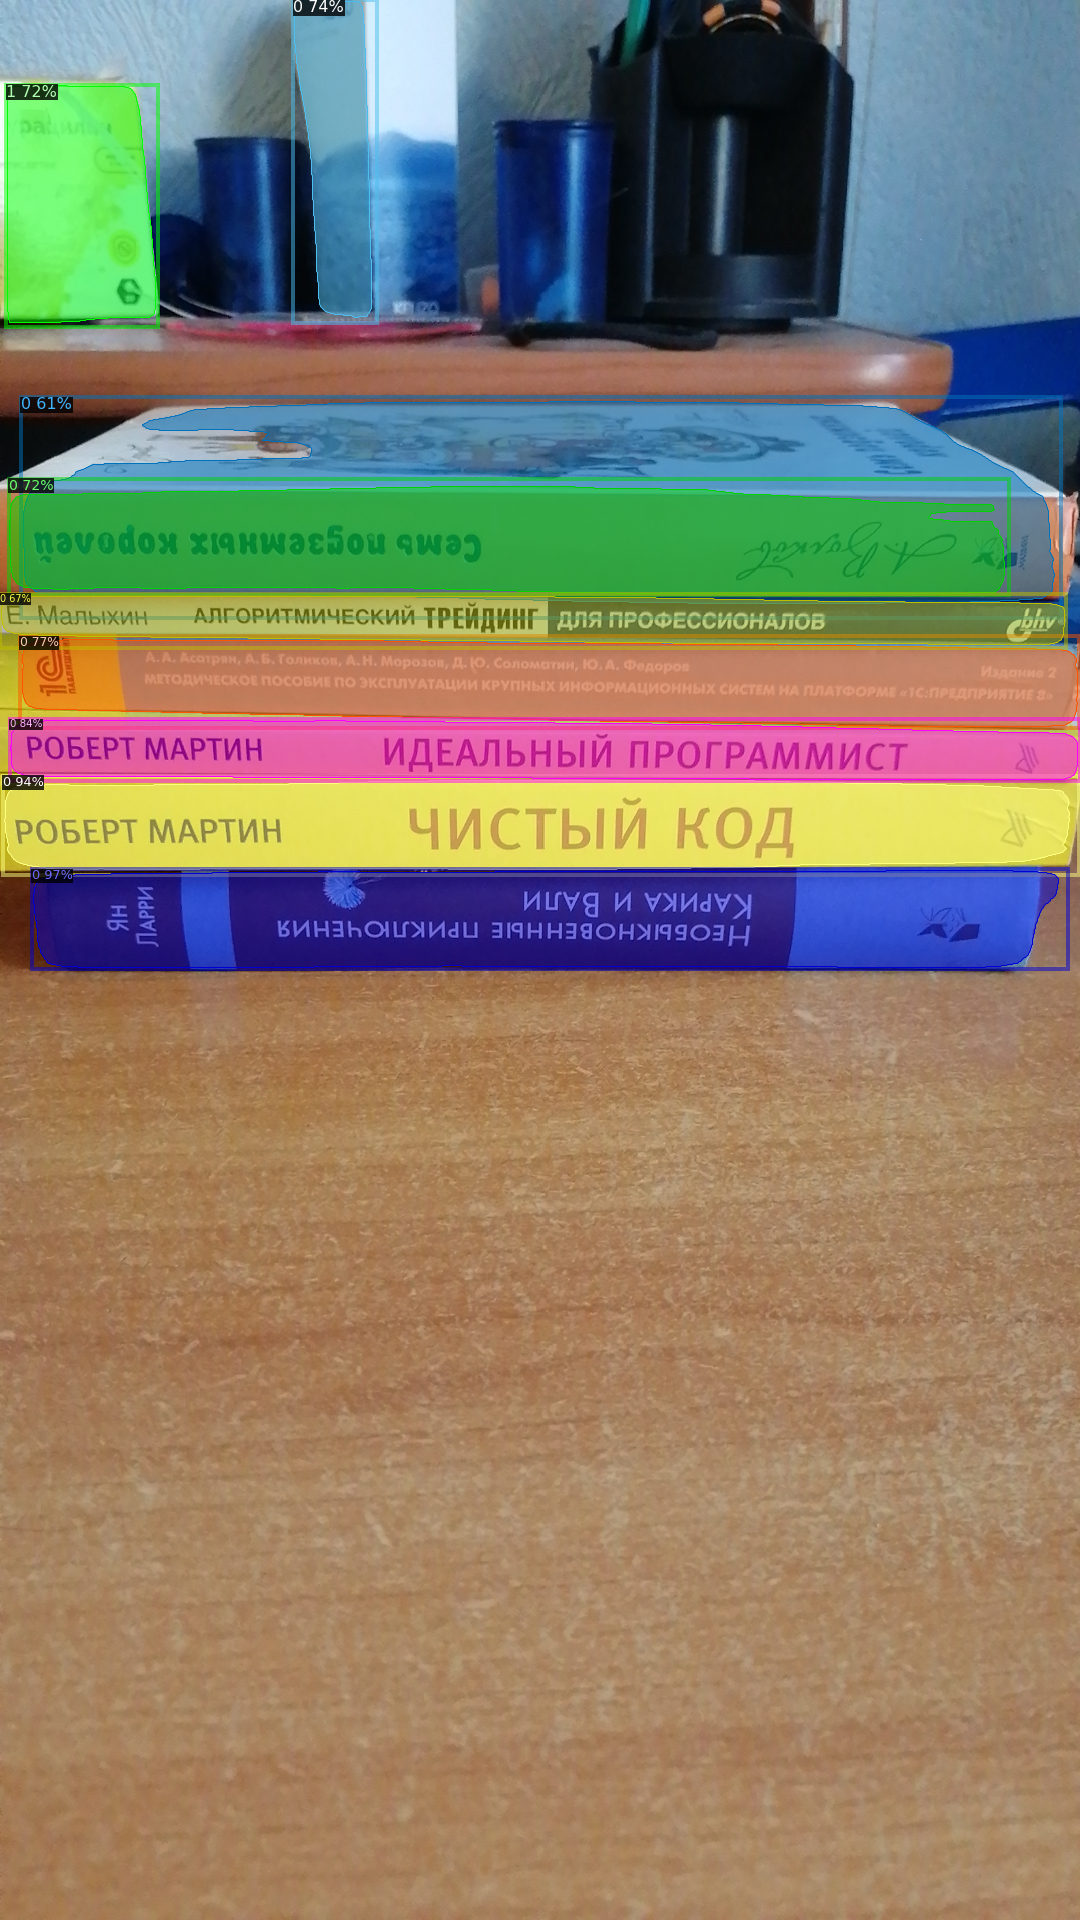

In [18]:
v = Visualizer(im[:, :, ::-1],
                scale=1.
)

out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
#out = v.draw_instance_predictions(outputs["instances"])

cv2_imshow(out.get_image()[:, :, ::-1])